In [1]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [64]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

In [ ]:
#adding Sales price to test data

if 'SalePrice' not in df2.columns:
    df2['SalePrice'] = 0

In [7]:
df = pd.concat([df1,df2],axis=0)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
# making a dataframe with only object data types

df_objects = df[df.select_dtypes('object').columns]
df_objects.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [20]:
df_null = df[df.isnull().sum()[df.isnull().sum() >0].index]

In [21]:
df_null.head()

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
0,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD
1,RL,80.0,NaN,AllPub,MetalSd,MetalSd,NaN,0.0,Gd,TA,...,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD
2,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD
3,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,NaN,0.0,TA,Gd,...,1998.0,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD
4,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,2000.0,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD


<Axes: >

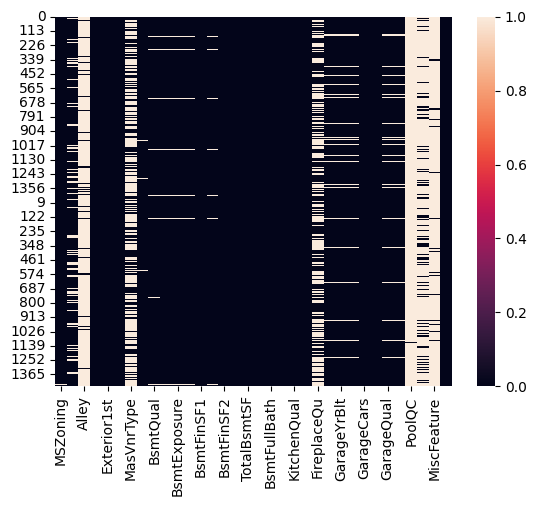

In [28]:
sns.heatmap(df_null.isna())

In [31]:
#dropping columns with nan values more than 1100
df = df.drop(df_objects.isna().sum()[df_objects.isna().sum() > 1100].index,axis=1)

In [32]:
#doing the above on df_objects too

df_objects = df_objects.drop(df_objects.isna().sum()[df_objects.isna().sum() > 1100].index, axis=1)

In [ ]:
#filling the remaining nan values with 'null'
df_objects = df_objects.fillna('null')

In [34]:
df_objects_encoded = pd.get_dummies(df_objects)

In [35]:
df_objects_encoded.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_null,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_null,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
1,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
2,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
4,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False


In [36]:
for i in df_objects_encoded.columns:
    if 'null' in i:
        df_objects_encoded = df_objects_encoded.drop(i,axis=1)
        print(i)

MSZoning_null
Utilities_null
Exterior1st_null
Exterior2nd_null
BsmtQual_null
BsmtCond_null
BsmtExposure_null
BsmtFinType1_null
BsmtFinType2_null
Electrical_null
KitchenQual_null
Functional_null
GarageType_null
GarageFinish_null
GarageQual_null
GarageCond_null
SaleType_null


In [37]:
df_objects_encoded.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,True,False,False,False,False,False
4,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False


In [41]:
new_df = pd.concat([df,df_objects_encoded],axis=1)

In [42]:
new_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,False,False,False,True,False,False,False,False,True,False
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,False,False,False,True,False,False,False,False,True,False
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,False,False,False,True,False,False,False,False,True,False
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,False,False,False,True,True,False,False,False,False,False
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,False,False,False,True,False,False,False,False,True,False


In [43]:
new_df = new_df.drop(new_df.select_dtypes(['object']),axis=1)

In [44]:
new_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,False,False,False,True,False,False,False,False,True,False


In [48]:
new_df.isna().sum()[new_df.isna().sum() > 0]

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [49]:
mode_cols = ['GarageYrBlt','BsmtFullBath','BsmtHalfBath','GarageCars']
mean_cols = ['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','GarageArea']

In [50]:
for i in mode_cols:
    new_df[i] = new_df[i].fillna(new_df[i].mode()[0])

for i in mean_cols:
    new_df[i] = new_df[i].fillna(new_df[i].mean())

In [52]:
new_df['TotalBsmtSF'] = new_df['TotalBsmtSF'].fillna(new_df['TotalBsmtSF'].mean())

In [53]:
new_df.isna().sum()[new_df.isna().sum() > 0]

Series([], dtype: int64)

In [54]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Columns: 268 entries, Id to SaleCondition_Partial
dtypes: bool(230), float64(11), int64(27)
memory usage: 1.5 MB


In [55]:
new_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,False,False,False,True,False,False,False,False,True,False
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,False,False,False,True,True,False,False,False,False,False
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,False,False,False,True,True,False,False,False,False,False
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,False,False,False,True,False,False,False,False,True,False


In [56]:
# splitting the data again into training and testing 

training_data = new_df[0:len(df1)]
testing_data = new_df[len(df1):]

In [63]:
testing_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=267)

In [ ]:
testing_data.drop('SalePrice',axis=1,inplace=True)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [68]:
X = training_data.drop('SalePrice',axis=1)
y = training_data['SalePrice']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [70]:
#reshaping ytrain ytest into 2d array

y_train = np.reshape(y_train,(-1,1))
y_test = np.reshape(y_test,(-1,1))

In [72]:
model_1 = LinearRegression()
model_1.fit(X,y)
y_pred = model_1.predict(X_test)
mean_squared_error(y_test,y_pred)

448571260.7270827

In [73]:
model_2 = XGBRegressor(n_estimators=1000,learning_rate=0.1)
model_2.fit(X,y)
y_pred2 = model_2.predict(X_test)
mean_squared_error(y_test,y_pred2)

1991.1195068359375

In [74]:
model_3 = RandomForestRegressor(n_estimators=100)
model_3.fit(X,y)
y_pred3 = model_3.predict(X_test)
mean_squared_error(y_test,y_pred3)

113924104.15668333

In [76]:
#we will use the xgbregressor model as it gave the least mean square error
testing_data = testing_data.set_index('Id')

In [83]:
testing_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,False,False,False,True,False,False,False,False,True,False
1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,False,False,False,True,False,False,False,False,True,False
1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,False,False,False,True,False,False,False,False,True,False
1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,False,False,False,True,False,False,False,False,True,False
1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,False,False,False,True,False,False,False,False,True,False
2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,False,False,False,True,True,False,False,False,False,False
2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,False,False,False,True,True,False,False,False,False,False


In [84]:
testing_data.index

Index([1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470,
       ...
       2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919],
      dtype='int64', name='Id', length=1459)